# Convert the wav files into Mel Spectrograms
https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html

In [1]:
import numpy as np
from copy import deepcopy
import os

import scipy.io.wavfile
from scipy.io.wavfile import read
from scipy import signal

from sklearn import preprocessing

import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
# Directory of where to find the wav files
rootdir = 'wav'

output_x_name = 'data_x_mel_spectro'
output_y_name = 'data_y_mel_spectro'

In [3]:
# Load genres
genre = pd.read_csv('genre.csv')

In [4]:
MAX_SONGS = 8500

numSongs = 0


dim = 1200 # length of the samples
offset = 1000 # start getting song values at this time

data_x = np.zeros((MAX_SONGS, 129, dim))
data_y = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        try:
            if not file.endswith(".wav"):
                continue
            if (numSongs %100 == 0):
                print(numSongs, ' songs processed')
                
            track_id = int(os.path.splitext(file)[0])
            
            y, sr = librosa.load(os.path.join(subdir,file))
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            
            pwr_spectr = librosa.power_to_db(S, ref=np.max)
            std_pwr_spectr = pwr_spectr
            mm_scaler = preprocessing.MinMaxScaler()
            std_pwr_spectr = mm_scaler.fit_transform(pwr_spectr)

            if std_pwr_spectr.shape[1] < offset+dim:
                continue

            
            numSongs += 1
            if (numSongs > MAX_SONGS):
                break
            data_x[numSongs-1, :, :] = std_pwr_spectr[:,offset:offset+dim]
            data_y.append(genre[genre['track_id'] == track_id]['genre_top'].iloc[0])
        
        except Exception as e: 
            print('Error with this file', e)
    if (numSongs > MAX_SONGS):
        break
        
# in case numSongs < max_songs
# data_x = data_x[0:numSongs-1, :, :]

data_y = np.array(data_y)
data_y = data_y[0:numSongs-1]

# np.save(output_x_name, data_x)
np.save(output_y_name, data_y)
np.save(output_x_name, data_x[0:numSongs-1, :, :])

0  songs processed
100  songs processed
200  songs processed
300  songs processed
400  songs processed
500  songs processed
600  songs processed
700  songs processed
800  songs processed
900  songs processed
1000  songs processed
1100  songs processed
1200  songs processed
1300  songs processed
1400  songs processed
1500  songs processed
1600  songs processed
1700  songs processed
1800  songs processed
1900  songs processed
2000  songs processed
2100  songs processed
2200  songs processed
2300  songs processed
2400  songs processed
2500  songs processed
2600  songs processed
2700  songs processed
2800  songs processed
2900  songs processed
3000  songs processed
3100  songs processed
3200  songs processed
3300  songs processed
3400  songs processed
3500  songs processed
3600  songs processed
3700  songs processed
3800  songs processed
3900  songs processed
4000  songs processed
4100  songs processed
4200  songs processed
4300  songs processed
4400  songs processed
4500  songs processed


In [5]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
data_y = encoder.fit_transform(data_y)

from sklearn.utils import shuffle
data_x, data_y= shuffle(data_x, data_y, random_state=0)

In [6]:
np.save(output_x_name, data_x)
np.save(output_y_name, data_y)

In [7]:
classes_amount = np.sum(data_y, axis=0)
print('Number in each class: ', classes_amount)

Number in each class:  [ 999  999 1000  996 1000 1000 1000  999]


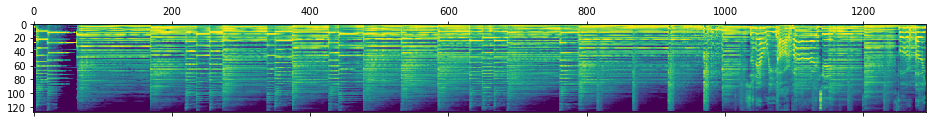

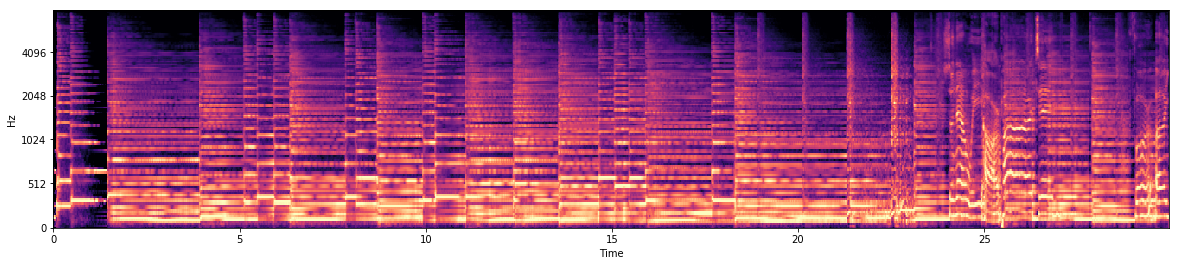

In [38]:
plt.matshow(std_pwr_spectr)
plt.figure()
plt.figure(figsize=(20, 4))
librosa.display.specshow(np.exp(std_pwr_spectr),
                         y_axis='mel', fmax=8000,
                         x_axis='time')